In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_ta as ta

#print(os.getcwd())
#df = pd.read_csv('demo/tutorial.csv', delimiter=';')
df_1 = pd.read_csv('training/prices_round_1_day_-2.csv', delimiter=';')
df_2 = pd.read_csv('training/prices_round_1_day_-1.csv', delimiter=';')
df_3 = pd.read_csv('training/prices_round_1_day_0.csv', delimiter=';')

# Append DF
df = df_1.append(df_2).append(df_3)
df.reset_index(drop=True, inplace=True)

#df['median_price'] = df.apply(lambda row: np.median([i for i in [row['bid_price_1'], row['bid_price_2'], row['bid_price_3'], row['ask_price_1'], row['ask_price_2'], row['ask_price_3']] if i > 0.0]), axis=1)


df

C:\Users\yinki\AppData\Local\Temp\ipykernel_21100\1951910601.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2).append(df_3)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
59997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
59998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [66]:
df_1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2,999700,AMETHYSTS,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
19996,-2,999800,STARFRUIT,5041,1,5040.0,25.0,NaN,NaN,5045,3,5047.0,26.0,NaN,NaN,5043.0,0.0
19997,-2,999800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,9998,1,10002.0,9.0,10004.0,1.0,9997.0,0.0
19998,-2,999900,STARFRUIT,5044,4,5040.0,32.0,NaN,NaN,5047,32,NaN,NaN,NaN,NaN,5045.5,0.0


In [67]:
df_2

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
2,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
3,-1,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1,999700,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,0.0
19996,-1,999800,STARFRUIT,5036,20,NaN,NaN,NaN,NaN,5043,20,NaN,NaN,NaN,NaN,5039.5,0.0
19997,-1,999800,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10002,10,10005.0,20.0,NaN,NaN,9998.5,0.0
19998,-1,999900,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0


In [68]:
df_3

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [69]:
# replace na with 0
df.fillna(0, inplace=True)

# Create columns volume_weighted bid and ask
df['volume_weighted_bid'] = (df['bid_price_1'] * df['bid_volume_1'] + df['bid_price_2'] * df['bid_volume_2'] + df['bid_price_3'] * df['bid_volume_3']) / (df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3'])
df['volume_weighted_ask'] = (df['ask_price_1'] * df['ask_volume_1'] + df['ask_price_2'] * df['ask_volume_2'] + df['ask_price_3'] * df['ask_volume_3']) / (df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3'])
df['total_bid_volume'] = df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3']
df['total_ask_volume'] = df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3']

# Bid price with greatest volume (best bid) and ask price with greatest volume (best ask)

# Assuming your DataFrame is named df

# Find the best bid price and volume
def find_best_bid(row):
    max_volume = max(row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'])
    if max_volume == row['bid_volume_1']:
        return row['bid_price_1']
    elif max_volume == row['bid_volume_2']:
        return row['bid_price_2']
    else:
        return row['bid_price_3']

df['best_bid'] = df.apply(find_best_bid, axis=1)

# Find the best ask price and volume
def find_best_ask(row):
    max_volume = max(row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3'])
    if max_volume == row['ask_volume_1']:
        return row['ask_price_1']
    elif max_volume == row['ask_volume_2']:
        return row['ask_price_2']
    else:
        return row['ask_price_3']

df['best_ask'] = df.apply(find_best_ask, axis=1)

# Calculate the mid price based on best bid and best ask
df['mid_price_best'] = (df['best_bid'] + df['best_ask']) / 2

# Get the median prices
df['median_price'] = df.apply(lambda row: np.median([i for i in [row['bid_price_1'], row['bid_price_2'], row['bid_price_3'], row['ask_price_1'], row['ask_price_2'], row['ask_price_3']] if i > 0.0]), axis=1)



# Display the updated DataFrame
# Add a column with the spread
df['spread'] = df['volume_weighted_ask'] - df['volume_weighted_bid']

df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,profit_and_loss,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,best_bid,best_ask,mid_price_best,median_price,spread
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,0.0,0.0,10004,...,0.0,9995.038462,10004.961538,26.0,26.0,9995.0,10005.0,10000.0,10000.0,9.923077
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,0.0,4997.000000,5003.000000,26.0,26.0,4997.0,5003.0,5000.0,5000.0,6.000000
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,0.0,0.0,10005,...,0.0,9996.000000,10005.000000,25.0,20.0,9995.0,10005.0,10000.0,10000.0,9.000000
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,0.0,4997.677419,5004.000000,31.0,20.0,4997.0,5004.0,5000.5,4999.0,6.322581
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,0.0,4996.032258,5003.000000,31.0,31.0,4996.0,5003.0,4999.5,4997.0,6.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,0.0,5048.185185,5054.923077,27.0,26.0,5048.0,5055.0,5051.5,5053.5,6.737892
59996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,0.0,5047.000000,5053.928571,27.0,28.0,5047.0,5054.0,5050.5,5052.0,6.928571
59997,0,999800,AMETHYSTS,9995,27,0.0,0.0,0.0,0.0,10005,...,0.0,9995.000000,10005.000000,27.0,27.0,9995.0,10005.0,10000.0,10000.0,10.000000
59998,0,999900,STARFRUIT,5048,2,5047.0,21.0,0.0,0.0,5054,...,0.0,5047.086957,5054.000000,23.0,23.0,5047.0,5054.0,5050.5,5048.0,6.913043


Product:  AMETHYSTS
9999.99655


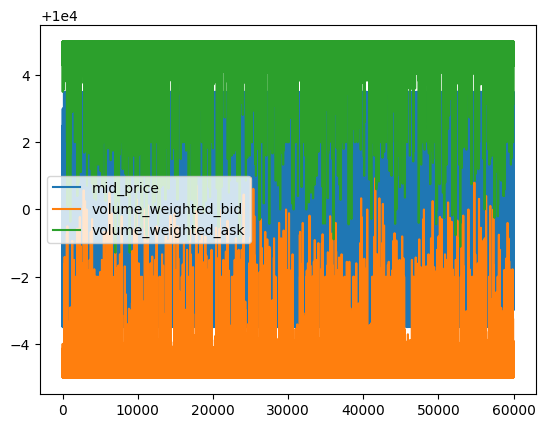

Product:  STARFRUIT
5037.425666666667


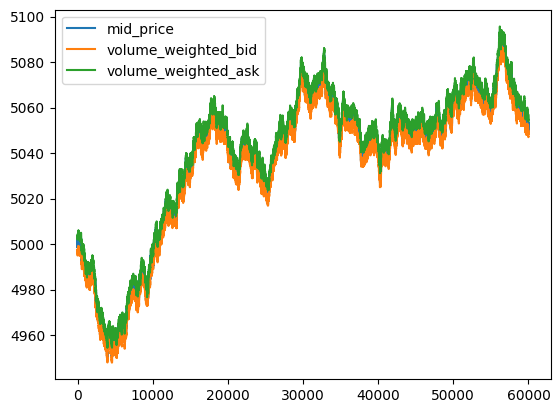

In [70]:
products = df['product'].unique()
products

for product in products:
    p_df = df[df['product'] == product]
    print("Product: ", product) 
    print(p_df['mid_price'].mean())
    
    #Plot the line graph for each product mid_price, mean of bid_price 1, 2, 3 and maean of ask_price 1, 2, 3
    plt.plot(p_df['mid_price'], label='mid_price')
    plt.plot(p_df['volume_weighted_bid'], label='volume_weighted_bid')
    plt.plot(p_df['volume_weighted_ask'], label='volume_weighted_ask')
    plt.legend()
    plt.show()
    
    
    
    
    


C:\Users\yinki\AppData\Local\Temp\ipykernel_21100\1296842027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['MACD'] = starfruit_df['mid_price'].ewm(span=12, adjust=False).mean() - starfruit_df['mid_price'].ewm(span=26, adjust=False).mean()
C:\Users\yinki\AppData\Local\Temp\ipykernel_21100\1296842027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['signal'] = starfruit_df['MACD'].ewm(span=9, adjust=False).mean()
C:\Users\yinki\AppData\Local\Temp\ipykernel_21100\1296842027.p

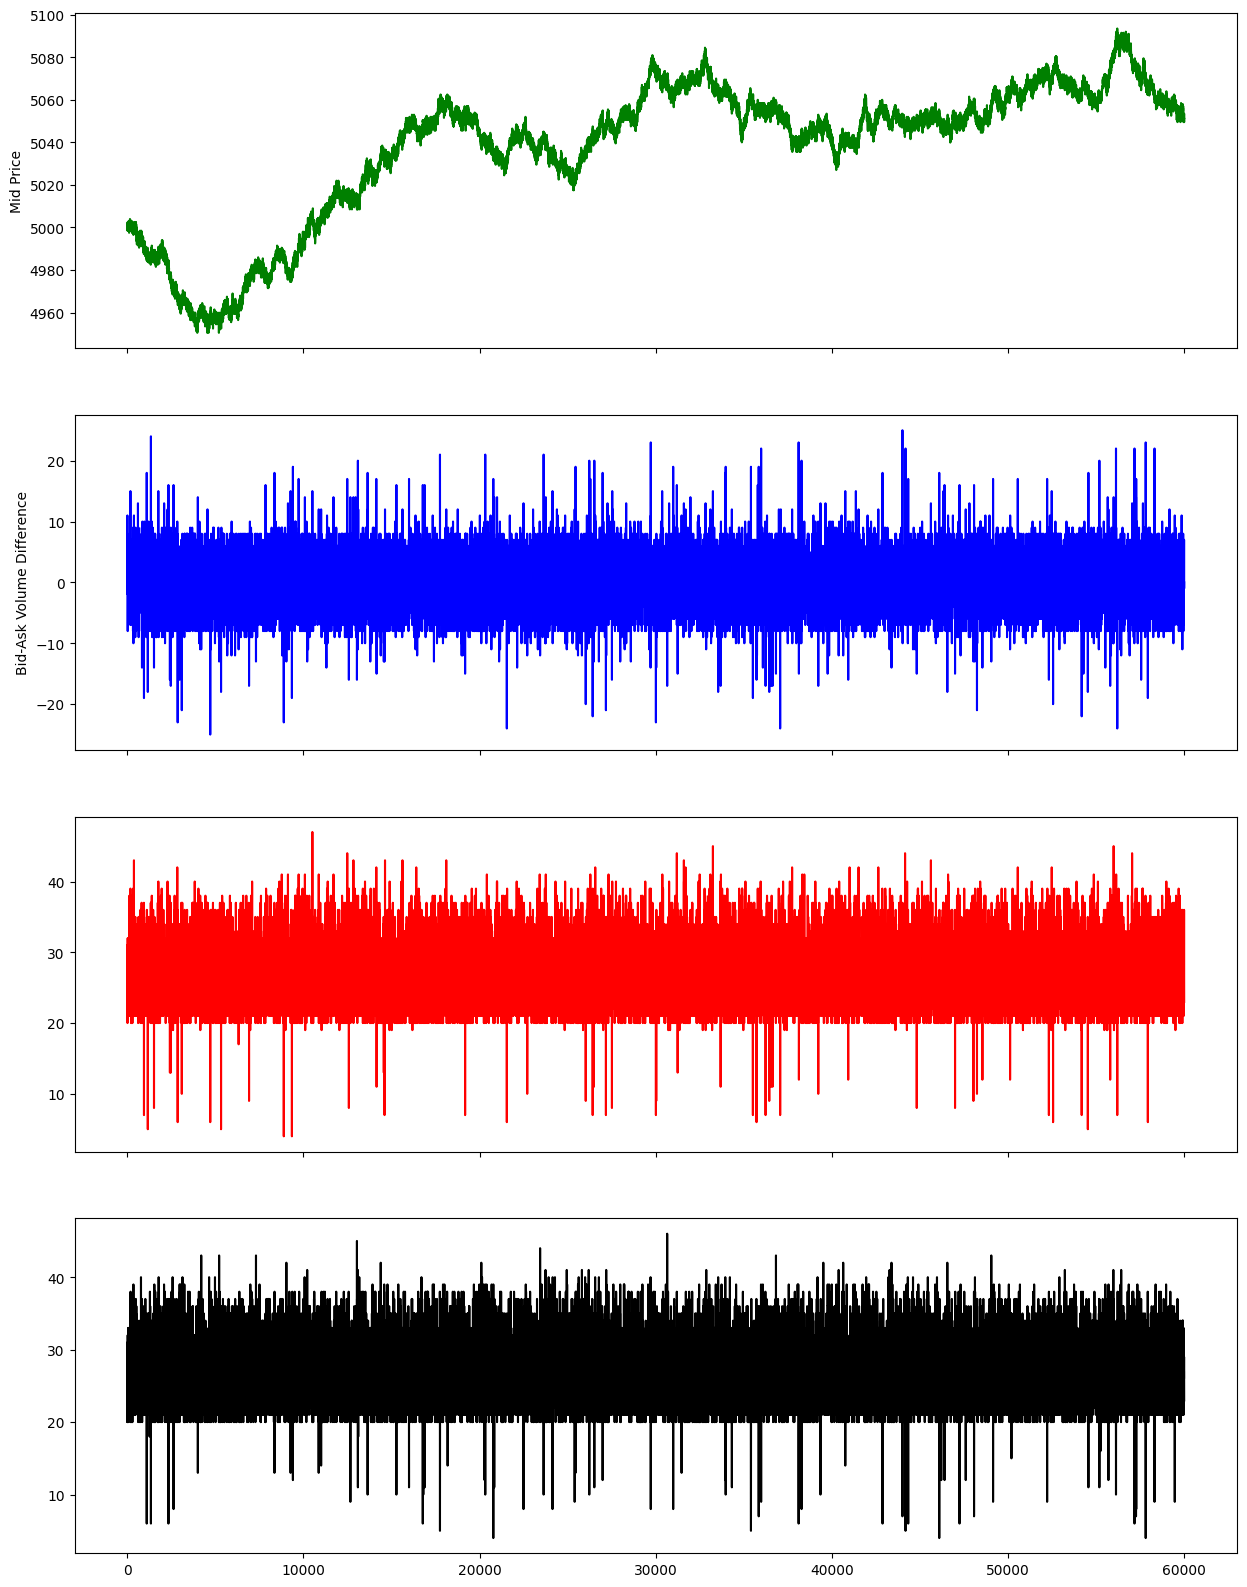

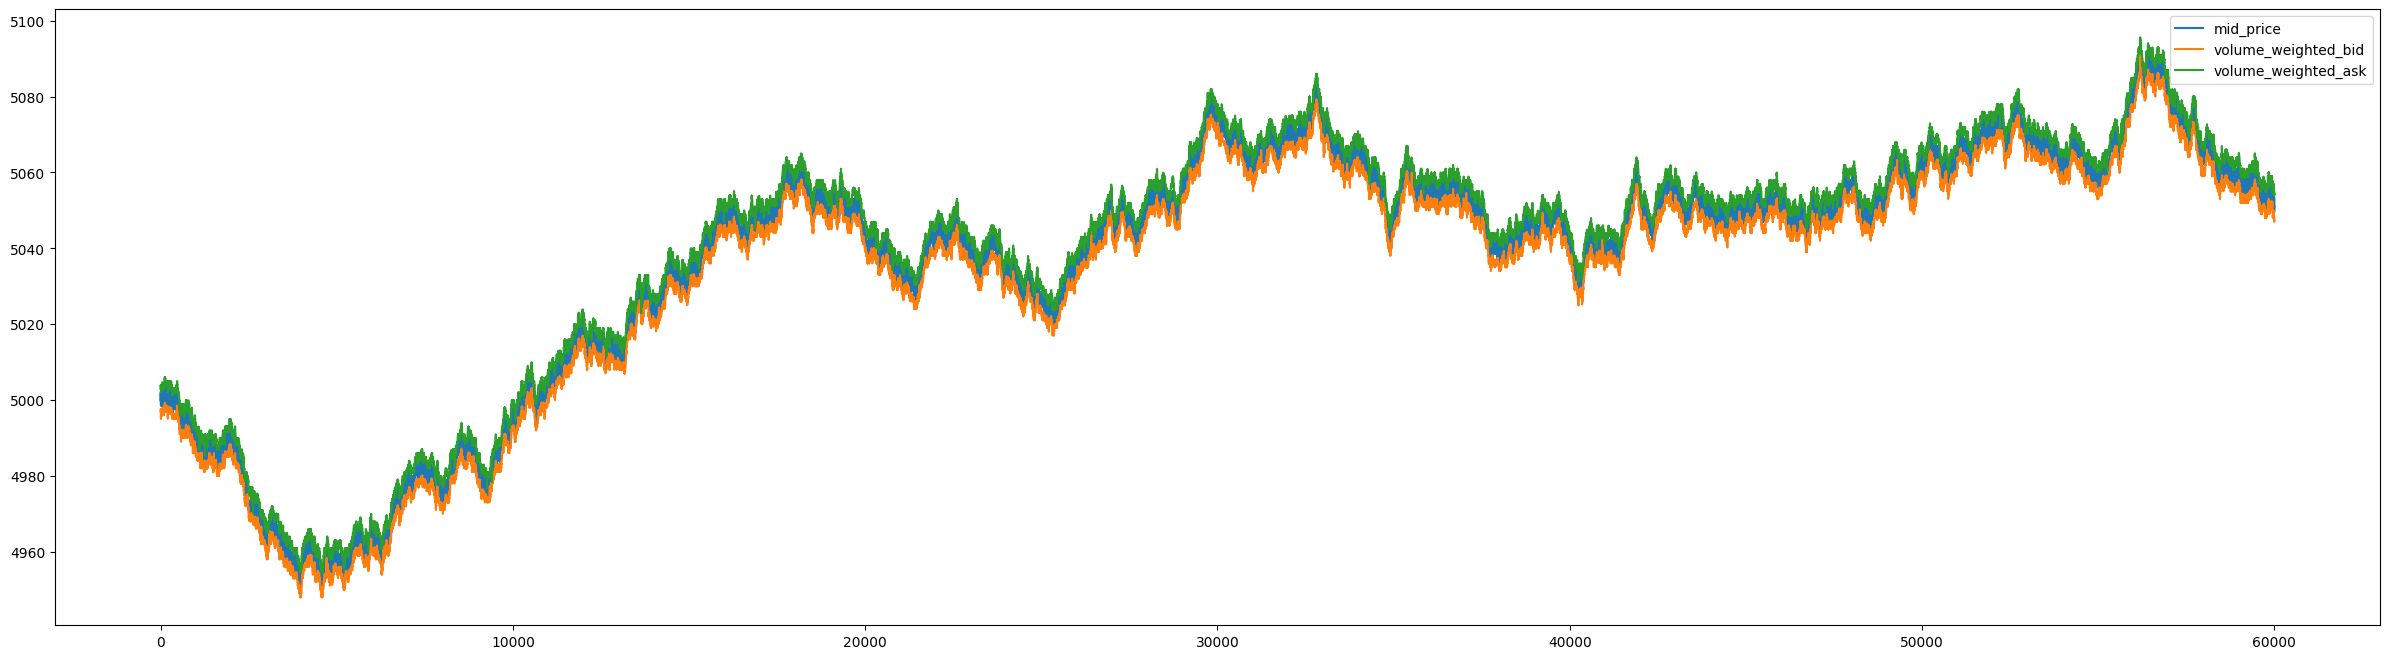

32.30304692724173


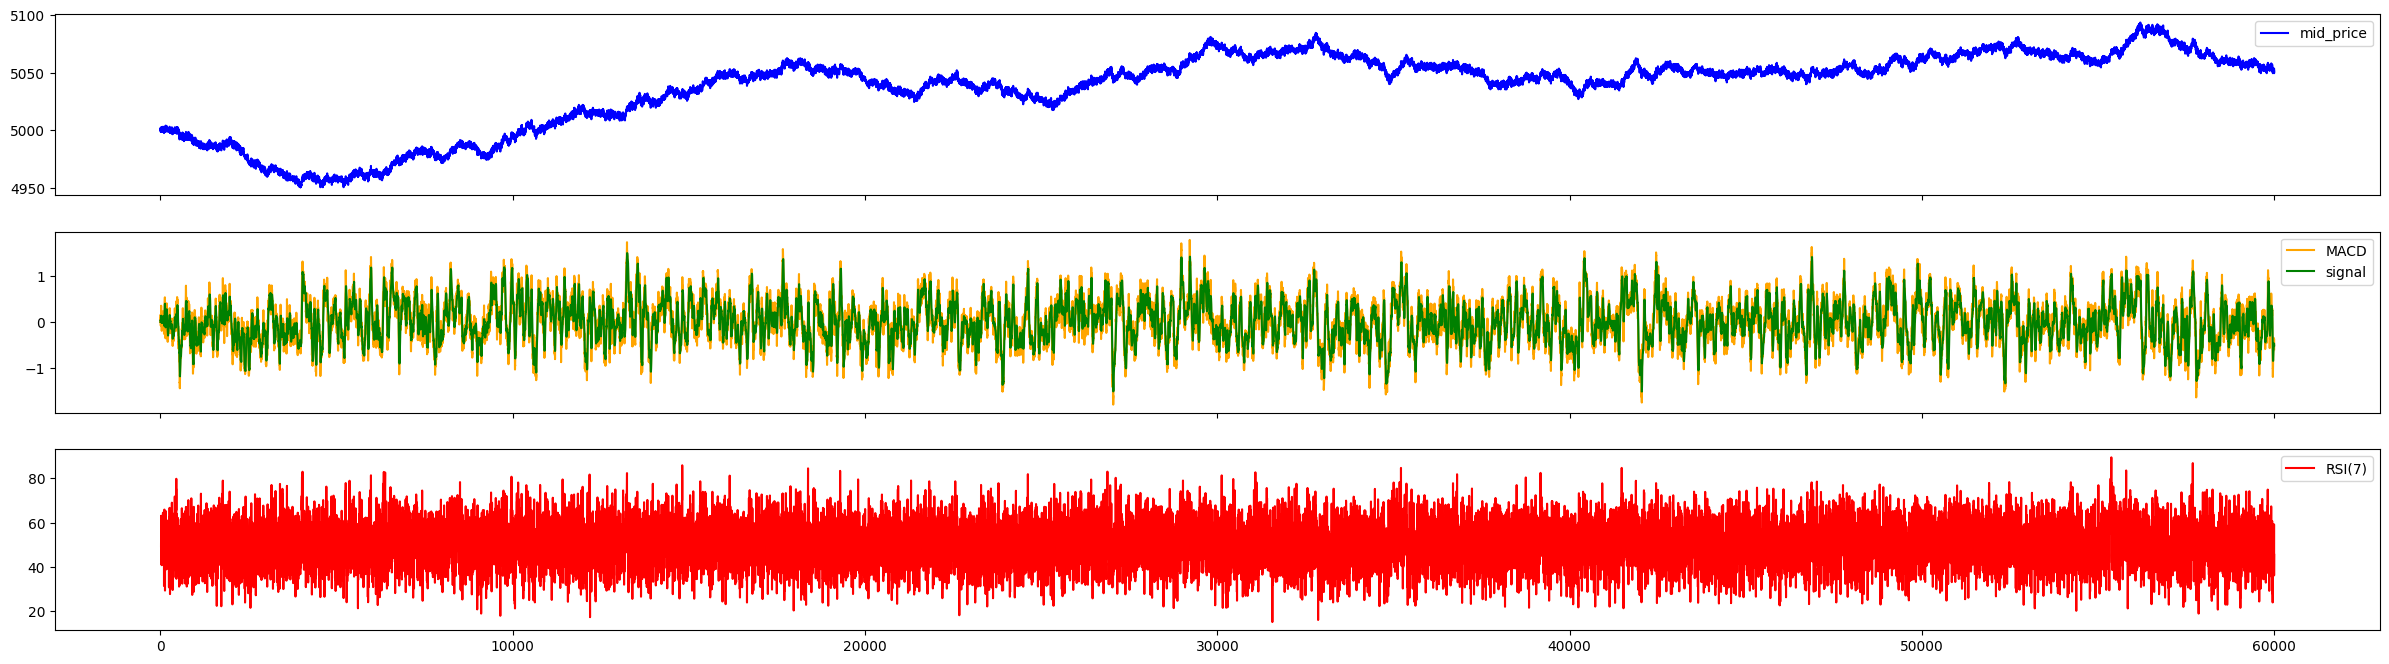

In [71]:
starfruit_df = df[df['product'] == 'STARFRUIT']
starfruit_df['MACD'] = starfruit_df['mid_price'].ewm(span=12, adjust=False).mean() - starfruit_df['mid_price'].ewm(span=26, adjust=False).mean()
starfruit_df['signal'] = starfruit_df['MACD'].ewm(span=9, adjust=False).mean()
starfruit_df['RSI(14)'] = ta.rsi(starfruit_df['mid_price'], length=14)
starfruit_df['RSI(7)'] = ta.rsi(starfruit_df['mid_price'], length=7)

# Create figure and axes for the two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15, 20))

# Plot mid price on the first subplot
ax1.plot(starfruit_df.index, starfruit_df['mid_price'], color='green')
ax1.set_ylabel('Mid Price')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax2.plot(starfruit_df.index, starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'], color='blue')
ax2.set_ylabel('Bid-Ask Volume Difference')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax3.plot(starfruit_df.index, starfruit_df['total_bid_volume'], color='red')

ax4.plot(starfruit_df.index, starfruit_df['total_ask_volume'], color='black')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(30, 8))
plt.plot(starfruit_df['mid_price'], label='mid_price')
plt.plot(starfruit_df['volume_weighted_bid'], label='volume_weighted_bid')
plt.plot(starfruit_df['volume_weighted_ask'], label='volume_weighted_ask')
plt.legend()
plt.show()


print(starfruit_df['mid_price'].std())


period1 = starfruit_df.iloc[:]
# Print MACD and signal with the mid_price above
# Create two subplots, one for mid_price and one for MACD and signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 8), sharex=True)

# Plot mid_price on the first subplot
ax1.plot(period1.index, period1['mid_price'], label='mid_price', color='blue')
ax1.legend()

# Plot MACD on the second subplot
ax2.plot(period1.index, period1['MACD'], label='MACD', color='orange')
ax2.legend()

# Plot signal on the second subplot
ax2.plot(period1.index, period1['signal'], label='signal', color='green')
ax2.legend()


ax3.plot(period1.index, period1['RSI(7)'], label='RSI(7)', color='red')
ax3.legend()
plt.show()



In [72]:
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,total_ask_volume,best_bid,best_ask,mid_price_best,median_price,spread,MACD,signal,RSI(14),RSI(7)
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,26.0,4997.0,5003.0,5000.0,5000.0,6.000000,0.000000,0.000000,NaN,NaN
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,20.0,4997.0,5004.0,5000.5,4999.0,6.322581,0.159544,0.031909,NaN,NaN
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,31.0,4996.0,5003.0,4999.5,4997.0,6.967742,0.123181,0.050163,NaN,NaN
7,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,27.0,4996.0,5003.0,4999.5,4999.5,7.000000,0.053401,0.050811,NaN,NaN
9,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,20.0,4995.0,5002.0,4998.5,4998.5,7.000000,-0.081650,0.024319,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,28.0,5049.0,5056.0,5052.5,5052.5,7.000000,-0.446447,-0.491025,48.529281,51.834261
59992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,29.0,5047.0,5054.0,5050.5,5048.0,6.750000,-0.518817,-0.496583,42.312390,38.011770
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,26.0,5048.0,5055.0,5051.5,5053.5,6.737892,-0.370175,-0.471302,53.096980,59.178504
59996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,28.0,5047.0,5054.0,5050.5,5052.0,6.928571,-0.568587,-0.490759,40.160303,36.141773


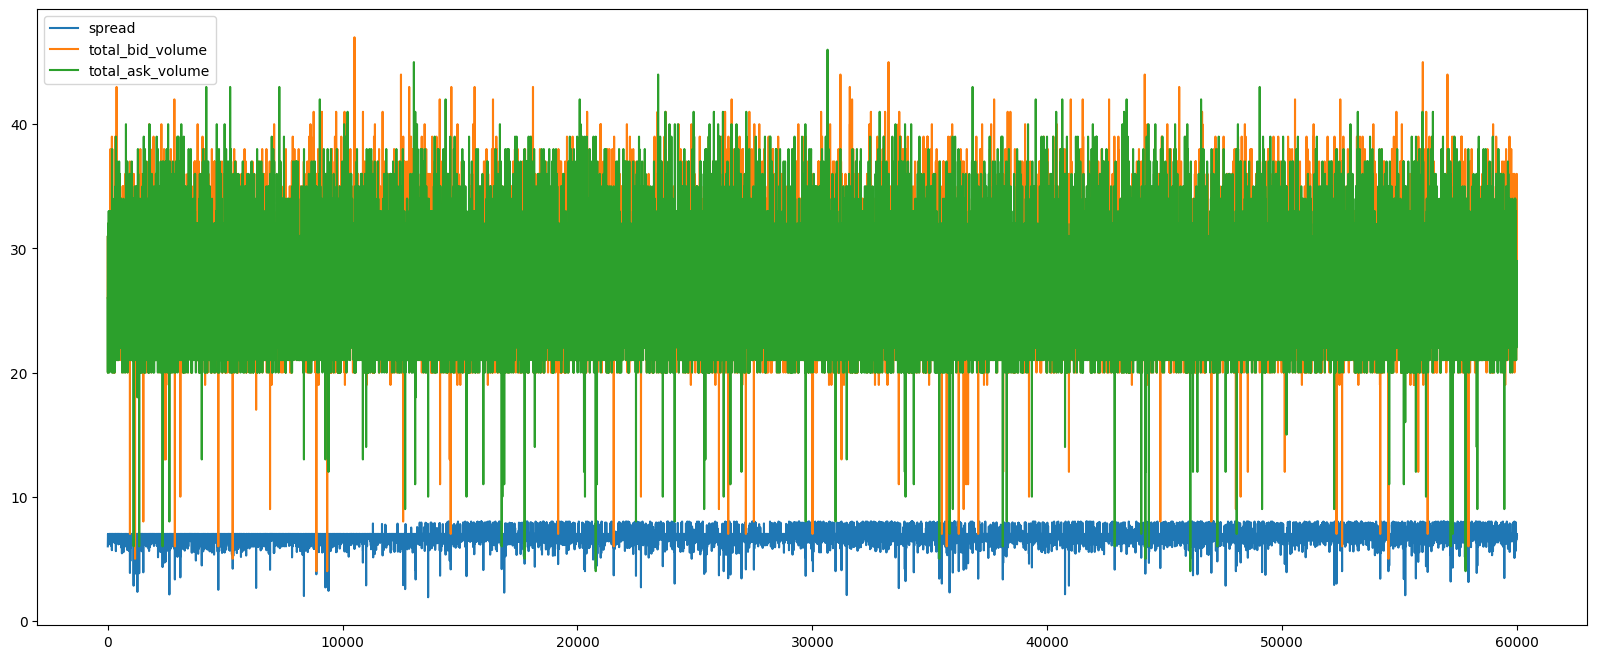

Average Spread: 6.862003774087599
Standard Deviation Spread: 0.3838702273417948


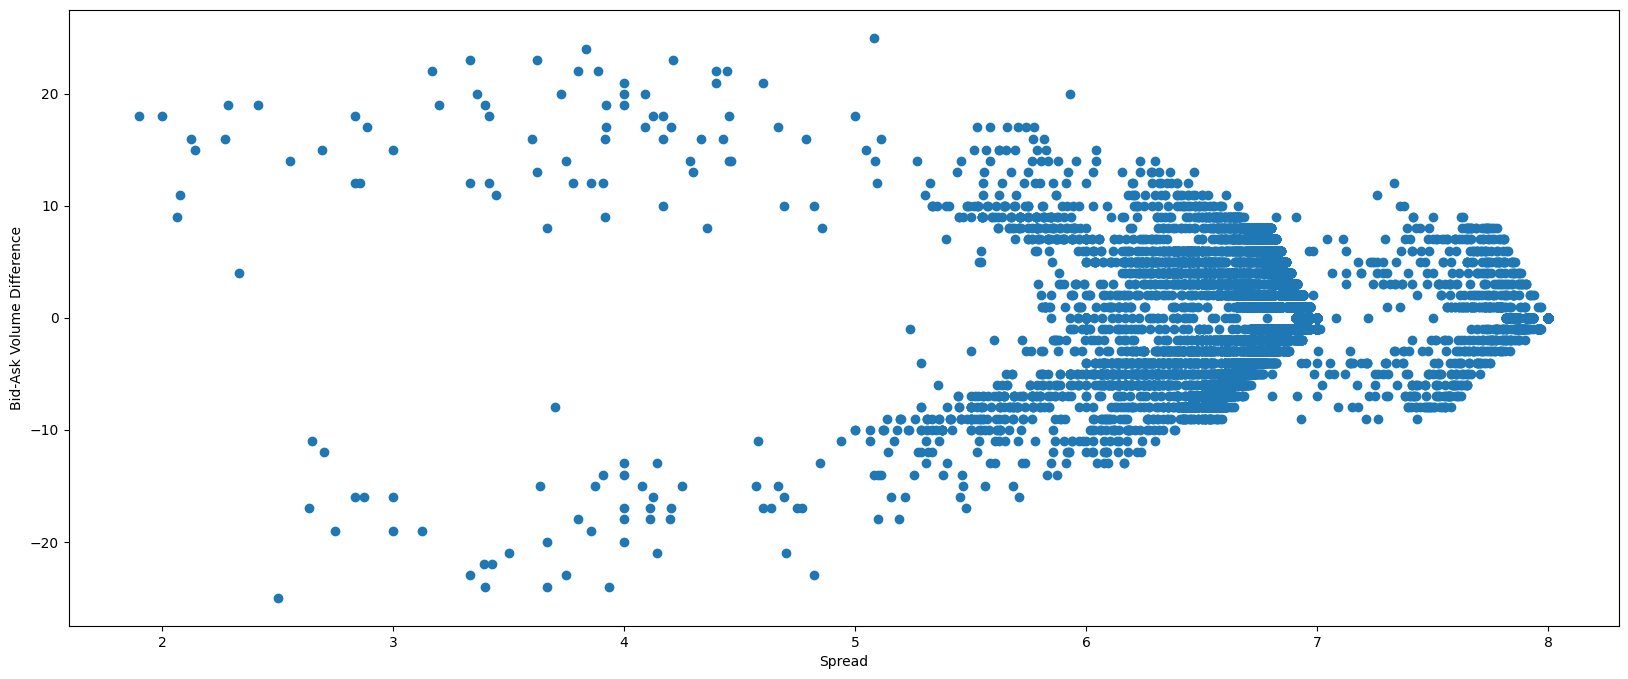

In [73]:
# Descriptive Statistics , finding mid_price, spread and volume 

# Plot spread and volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(starfruit_df['spread'], label='spread')
plt.plot(starfruit_df['total_bid_volume'], label='total_bid_volume')
plt.plot(starfruit_df['total_ask_volume'], label='total_ask_volume')
plt.legend()
plt.show()

# Average spread
print("Average Spread: " + str(starfruit_df['spread'].mean()))
print("Standard Deviation Spread: " + str(starfruit_df['spread'].std()))


# Plot the spread against difference in bid and ask volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.scatter(starfruit_df['spread'], starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'])
plt.xlabel('Spread')
plt.ylabel('Bid-Ask Volume Difference')
plt.show()


        

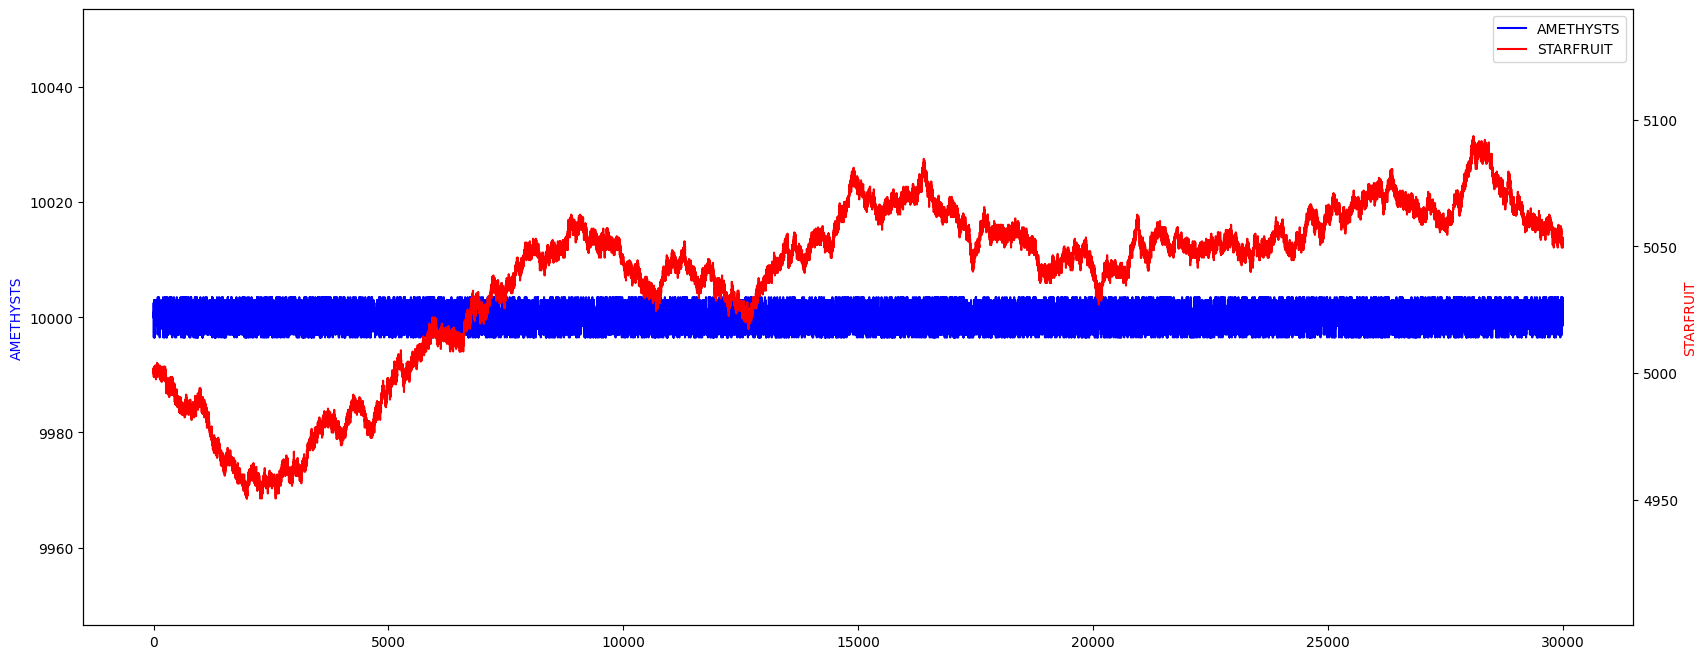

In [74]:
# Pipeline for Pairs Trading
#print(os.getcwd())
from statsmodels.tsa.stattools import coint
import pandas as pd
import numpy as np

product1, product2 = 'AMETHYSTS', 'STARFRUIT'
p1_df = df[df['product'] == product1].reset_index(drop=True)
p2_df = df[df['product'] == product2].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot both mid prices on the same plot
ax1.plot(p1_df['mid_price'], label=product1, color='blue')
ax1.set_ylabel(product1, color='blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

ax2.plot(p2_df['mid_price'], label=product2, color='red')
ax2.set_ylabel(product2, color='red')

# Adjust y-axis limits for each product
min1, max1 = p1_df['mid_price'].min(), p1_df['mid_price'].max()
min2, max2 = p2_df['mid_price'].min(), p2_df['mid_price'].max()
ax1.set_ylim(min1 - 50, max1 + 50)  # Set limits for product1
ax2.set_ylim(min2 - 50, max2 + 50)    # Set limits for product2

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.show()


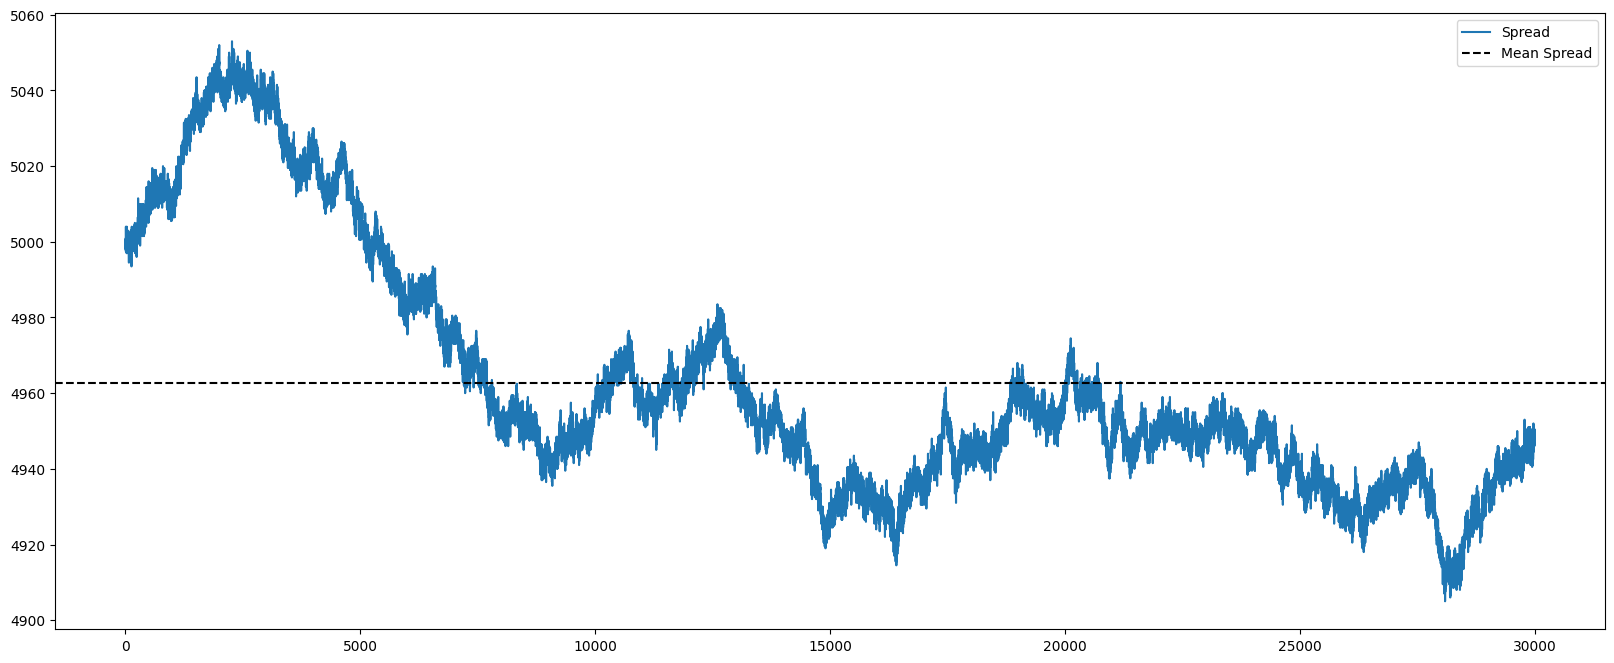

Cointegration Test P-Value: 0.000000
Standard Deviation of Spread: 32.32967868935901
ADF P-Value: 0.601950
Regression Formula:
const        3879.940537
mid_price       0.115749
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8627
Date:                Mon, 08 Apr 2024   Prob (F-statistic):              0.353
Time:                        17:36:46   Log-Likelihood:            -1.4682e+05
No. Observations:               30000   AIC:                         2.936e+05
Df Residuals:                   29998   BIC:                         2.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

In [75]:
# Plot the spread
fig, ax = plt.subplots(figsize=(20, 8))
spread = p1_df['mid_price'] - p2_df['mid_price']
plt.plot(spread, label='Spread')
plt.axhline(spread.mean(), color='black', linestyle='--', label='Mean Spread')
plt.legend()
plt.show()

print('Cointegration Test P-Value: %f' % coint(p1_df['mid_price'], p2_df['mid_price'])[1])
print(f"Standard Deviation of Spread: {spread.std()}")

# ADF Fuller on Stationarity of Spread Time Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(spread)
print('ADF P-Value: %f' % result[1])


# OLS Regression on the 2 Products
import statsmodels.api as sm

X = p1_df['mid_price']
y = p2_df['mid_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# Print out the formula
print("Regression Formula:")
print(model.params)
print(model.summary())

In [76]:
#Load from Backtest Mid_prices
# p1 = "AMETHYSTS"
# p2 = "STARFRUIT"

# p1_df = pd.read_csv(f"{p1}_round_1_day_-2.csv")
# p2_df = pd.read_csv(f"{p2}_round_1_day_-2.csv")

# p1_df['timestamp'] = (p1_df.index * 100)
# p1_df.rename(columns={p1: 'mid_price'}, inplace=True)

# p2_df['timestamp'] = (p2_df.index * 100)
# p2_df.rename(columns={p2: 'mid_price'}, inplace=True)




n=1, mse=2.8870007870499723 mape=0.024581234954397013 rsquared=0.9666347535284758
Model Alpha: 1.0341127650351432 Model L1 Ratio: 1.0
n=1, BIC=6370.008554544529
n=1, mse=2.885117477844276 mape=0.0244550678550786 rsquared=1.0
Model Intercept: 6.9936095207339335
n=1, BIC=-173204.7120891548


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(




n=2, mse=2.2621312046618063 mape=0.022386311614574602 rsquared=0.9738564099001887
Model Alpha: 1.0445655493430581 Model L1 Ratio: 0.99
n=2, BIC=4915.243308542664
n=2, mse=2.259517937004139 mape=0.022361741939323696 rsquared=1.0
Model Intercept: 3.701549504317891
n=2, BIC=-188545.52105215928


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featur



n=3, mse=2.0980342858104133 mape=0.021490731921354488 rsquared=0.97575288813021
Model Alpha: 1.0341270204516393 Model L1 Ratio: 1.0
n=3, BIC=4472.103656130058
n=3, mse=2.08872594855718 mape=0.021452194336065565 rsquared=1.0
Model Intercept: 2.6708989648977877
n=3, BIC=-192844.7974414713


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.750e+03, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=4, mse=2.037570713728297 mape=0.02110450904536811 rsquared=0.9764522782742305
Model Alpha: 1.0341173720217884 Model L1 Ratio: 1.0
n=4, BIC=4304.635263928685
n=4, mse=2.0021462142257955 mape=0.020913068241580707 rsquared=1.0
Model Intercept: 2.198140282940585
n=4, BIC=-194515.7613019888


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.745e+03, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=5, mse=2.013237806057746 mape=0.020963360829975228 rsquared=0.9767334879199839
Model Alpha: 1.034119390933315 Model L1 Ratio: 1.0
n=5, BIC=4241.26264504729
n=5, mse=1.9692436052510482 mape=0.020751244221147856 rsquared=1.0
Model Intercept: 1.9081421064039858
n=5, BIC=-195472.6559374819


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.318e+03, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=6, mse=2.0083826477248685 mape=0.020931379352920013 rsquared=0.9767895978339058
Model Alpha: 1.034124730256204 Model L1 Ratio: 1.0
n=6, BIC=4235.477230405997
n=6, mse=1.9497024888729901 mape=0.020615882817232492 rsquared=1.0
Model Intercept: 1.727619328980019
n=6, BIC=-195861.14210979262


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e+03, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=7, mse=2.0083243978714482 mape=0.02093105955561847 rsquared=0.9767902710136535
Model Alpha: 1.0341312509472866 Model L1 Ratio: 1.0
n=7, BIC=4244.002584768495
n=7, mse=1.9432677994074758 mape=0.020578183960645324 rsquared=1.0
Model Intercept: 1.6335040685729165
n=7, BIC=-196018.45136663478


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e+03, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=8, mse=2.0083167487153264 mape=0.020931011843254757 rsquared=0.9767903594131375
Model Alpha: 1.0341351928010127 Model L1 Ratio: 1.0
n=8, BIC=4252.679084249032
n=8, mse=1.9414974360092567 mape=0.020566420112345274 rsquared=1.0
Model Intercept: 1.5965553051355528
n=8, BIC=-196026.6218703448


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+03, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=9, mse=2.0079609685318025 mape=0.02093023002106454 rsquared=0.9767950702166971
Model Alpha: 1.0341293090371435 Model L1 Ratio: 1.0
n=9, BIC=4259.61697465682
n=9, mse=1.9407923688008375 mape=0.020574070612162598 rsquared=1.0
Model Intercept: 1.5258304208909976
n=9, BIC=-196089.85951821954


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.405e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=10, mse=2.006927733413709 mape=0.020922998036366863 rsquared=0.9768070107617279
Model Alpha: 1.0341399522596182 Model L1 Ratio: 1.0
n=10, BIC=4265.228974858585
n=10, mse=1.9427085560662218 mape=0.020584876536845154 rsquared=1.0
Model Intercept: 1.4735313521487399
n=10, BIC=-196112.3164057657


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.402e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=11, mse=2.006938597332725 mape=0.020923154146048374 rsquared=0.9768068852132328
Model Alpha: 1.0341465221405821 Model L1 Ratio: 1.0
n=11, BIC=4273.960624556842
n=11, mse=1.9406433681620554 mape=0.02058112625986117 rsquared=1.0
Model Intercept: 1.466369027769069
n=11, BIC=-196108.08101084534


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.402e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=12, mse=2.0069611572466948 mape=0.020923262913413242 rsquared=0.9768066245003864
Model Alpha: 1.0341491612840439 Model L1 Ratio: 1.0
n=12, BIC=4282.727228807735
n=12, mse=1.9404398460086352 mape=0.0205793645483407 rsquared=1.0
Model Intercept: 1.463056564331629
n=12, BIC=-196091.12308369664


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.402e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=13, mse=2.0069575428872755 mape=0.020923240385378447 rsquared=0.9768066662696029
Model Alpha: 1.034153085883115 Model L1 Ratio: 1.0
n=13, BIC=4291.415608290167
n=13, mse=1.940321826154236 mape=0.02057784834123285 rsquared=1.0
Model Intercept: 1.45686655472673
n=13, BIC=-196071.82776766687


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.401e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=14, mse=2.0069677300122426 mape=0.02092201267186367 rsquared=0.9768058989634263
Model Alpha: 1.0341448707381664 Model L1 Ratio: 1.0
n=14, BIC=4299.446275550896
n=14, mse=1.9402352471570723 mape=0.020574972746694082 rsquared=1.0
Model Intercept: 1.4463321635630564
n=14, BIC=-196064.2721700059


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.401e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=15, mse=2.0069007920796564 mape=0.020921659239193143 rsquared=0.9768066725509377
Model Alpha: 1.0341501793937695 Model L1 Ratio: 1.0
n=15, BIC=4307.945270278272
n=15, mse=1.9402825538424322 mape=0.020575611035764683 rsquared=1.0
Model Intercept: 1.4584937272437344
n=15, BIC=-196048.5668889337


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=16, mse=2.0068894420073855 mape=0.02092158865028138 rsquared=0.9768068037213192
Model Alpha: 1.0341528238683781 Model L1 Ratio: 1.0
n=16, BIC=4316.610368638038
n=16, mse=1.9406200314615354 mape=0.020577889833353007 rsquared=1.0
Model Intercept: 1.447797628882583
n=16, BIC=-196031.02377088816


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=17, mse=2.0068836890685215 mape=0.020921552764576027 rsquared=0.9768068702068154
Model Alpha: 1.0341573675307545 Model L1 Ratio: 1.0
n=17, BIC=4325.292192267476
n=17, mse=1.9411702569861347 mape=0.020583866462905574 rsquared=1.0
Model Intercept: 1.4396144378854432
n=17, BIC=-196011.70971198037


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=18, mse=2.00686918564073 mape=0.020921469099284273 rsquared=0.976807037819859
Model Alpha: 1.034161274236678 Model L1 Ratio: 1.0
n=18, BIC=4333.947867373149
n=18, mse=1.9410504592245637 mape=0.02058377970590998 rsquared=1.0
Model Intercept: 1.4392897314210131
n=18, BIC=-195991.123268931


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.399e+03, tolerance: 2.484e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized



n=19, mse=2.007015559599316 mape=0.020921559328271694 rsquared=0.9768046948522768
Model Alpha: 1.034146350520371 Model L1 Ratio: 1.0
n=19, BIC=4342.384448732302
n=19, mse=1.9411383159234794 mape=0.020583601911504715 rsquared=1.0
Model Intercept: 1.4534311845018237
n=19, BIC=-195982.20718046196
     n       mse      mape  rsquared          bic  \
4    5  2.013238  0.020963  0.976733  4241.262645   
5    6  2.008383  0.020931  0.976790  4235.477230   
6    7  2.008324  0.020931  0.976790  4244.002585   
7    8  2.008317  0.020931  0.976790  4252.679084   
8    9  2.007961  0.020930  0.976795  4259.616975   
3    4  2.037571  0.021105  0.976452  4304.635264   
9   10  2.006928  0.020923  0.976807  4265.228975   
10  11  2.006939  0.020923  0.976807  4273.960625   
11  12  2.006961  0.020923  0.976807  4282.727229   
12  13  2.006958  0.020923  0.976807  4291.415608   

                                         coefficients  intercept  \
4   [0.0, 0.33791332214313974, 0.3337481764570071,.

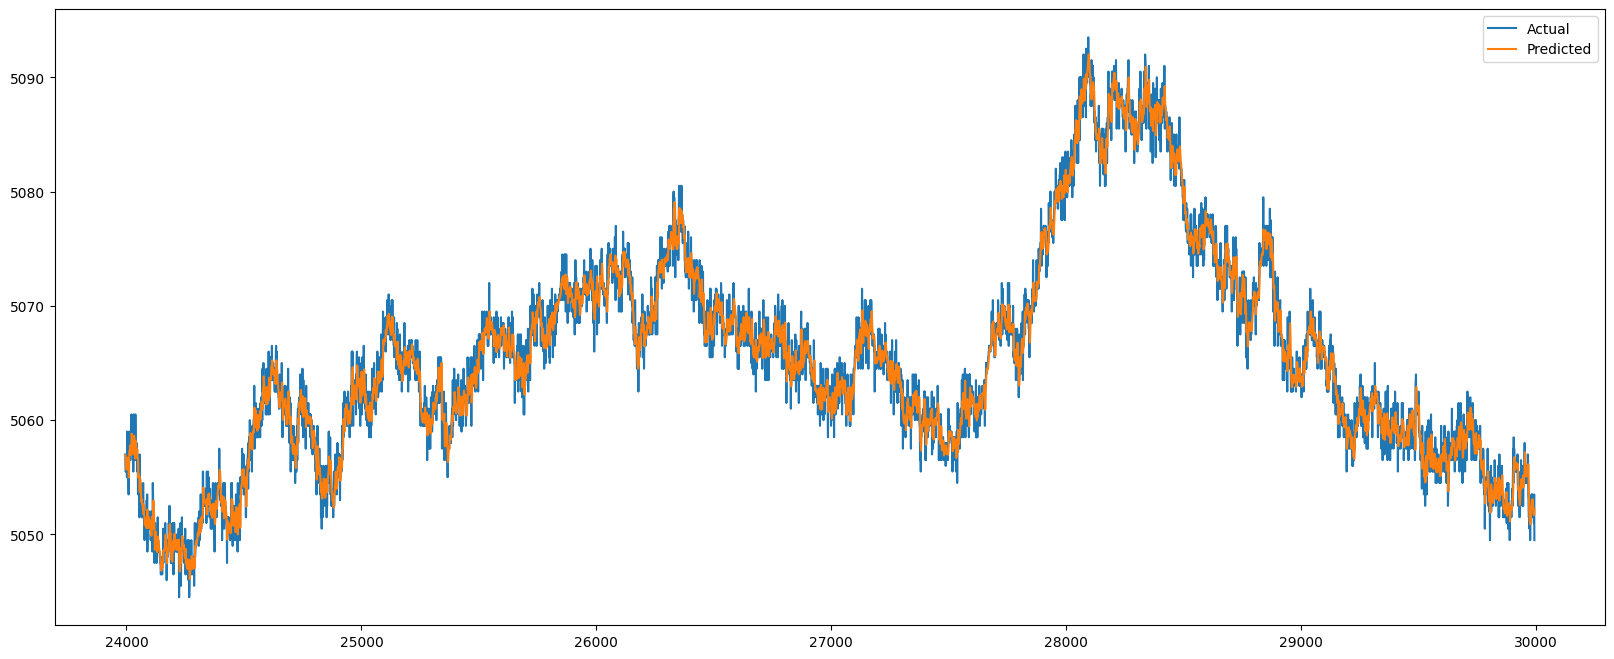

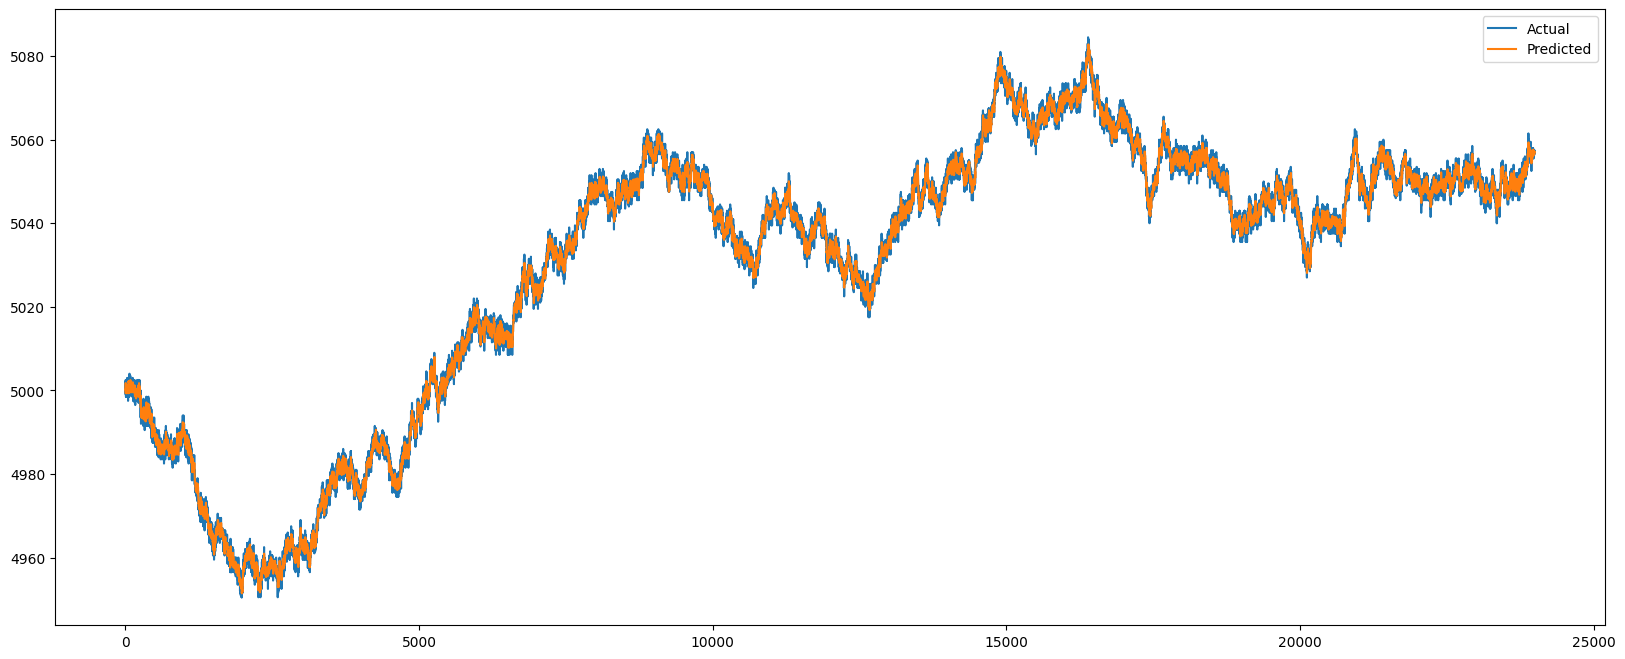

Percentage of times the predicted change same direction as the actual change: 0.5424237372895483
Percentage of times the predicted change same direction as the actual change in Train: 0.5389039383204834
{1: 0.39866666666666667, 2: 0.5326666666666666, 3: 0.5391666666666667, 4: 0.5397566261043507, 5: 0.5424237372895483, 6: 0.543757292882147, 7: 0.5435905984330722, 8: 0.5435905984330722, 9: 0.5436812270756919, 10: 0.5438479493164388, 11: 0.5436812270756919, 12: 0.5438479493164388, 13: 0.5438479493164388, 14: 0.543938635984659, 15: 0.543938635984659, 16: 0.543938635984659, 17: 0.543938635984659, 18: 0.543938635984659, 19: 0.5438625750500333}
n=5, Coefficients: [0.0, 0.33791332214313974, 0.3337481764570071, 0.20117035619236828, 0.08200505355958354, 0.043948316609723814], Intercept: 6.115990653031986
[5, [0.33791332214313974, 0.3337481764570071, 0.20117035619236828, 0.08200505355958354, 0.043948316609723814], 6.115990653031986]
MSE: 2.013237806057746, MAPE: 0.020963360829975228, R-Squared: 0

In [77]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
best_mape = 10000000
best_bic = 10000000
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}

results = {
    'n': [],
    'mse': [],
    'mape': [],
    'rsquared': [],
    'bic': [],
    'coefficients': [],
    'intercept': [],
    'Y_PRED': [],
    'Y_TEST': [],
    'Y_TRAIN': [],
    'Y_TRAIN_PRED': [],
    'Type': []
    
}
for n in range(1, 20):
    X = pd.DataFrame(p2_df['mid_price'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['mid_price'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['mid_price']
    X = X.iloc[:, 1:]
    

    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], fit_intercept=True)
    model2 = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
    
    model2 = model2.fit()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rsquared = model.score(X_test, y_test)
    print()
    
    y_pred_train2 = model2.predict(X_train)
    y_pred2 = model2.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred2)
    mape2 = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
    #print(model2.summary())
    rsquared2 = model2.pseudo_rsquared()
    
    print()
    
    
    # For Elastic Net
    print(f"n={n}, mse={mse} mape={mape} rsquared={rsquared}")
    print(f"Model Alpha: {model.alpha_} Model L1 Ratio: {model.l1_ratio_}")
    BIC = len(y_test) * np.log(mse) + n * np.log(len(y_test))
    print(f"n={n}, BIC={BIC}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    
    
    # For GLM
    print(f"n={n}, mse={mse2} mape={mape2} rsquared={rsquared2}")
    print(f"Model Intercept: {model2.params[0]}")
    BIC2 = model2.bic
    print(f"n={n}, BIC={BIC2}")
    count = 0
    y_pred2 = pd.Series(y_pred2)
    y_pred2.index = y_test.index
    
    
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    # Store the results elastic net
    results['n'].append(n)
    results['mse'].append(mse)
    results['mape'].append(mape)
    results['rsquared'].append(rsquared)
    results['bic'].append(BIC)
    results['coefficients'].append(list(model.coef_))
    results['intercept'].append(model.intercept_)
    results['Y_PRED'].append(y_pred)
    results['Y_TEST'].append(y_test)
    results['Y_TRAIN'].append(y_train)
    results['Y_TRAIN_PRED'].append(y_pred_train)
    results['Type'].append('Elastic Net')
    
    
    # Store results for GLM
    # results['n'].append(n)
    # results['mse'].append(mse2)
    # results['mape'].append(mape2)
    # results['rsquared'].append(rsquared2)
    # results['bic'].append(BIC2)
    # results['coefficients'].append(list(model2.params))
    # results['intercept'].append(model2.params[0])
    # results['Y_PRED'].append(y_pred2)
    # results['Y_TEST'].append(y_test)
    # results['Y_TRAIN'].append(y_train)
    # results['Y_TRAIN_PRED'].append(y_pred_train2)
    # results['Type'].append('GLM')
    
    
    
#print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
#print(f"Best Coefficients: {list(best_coef)}")
#print(f"Model Intercept: {model.intercept_}")

# Get the best results getting the minimum model with the lowest sum rankings of mse, mape, rsquared and bic
best_results = pd.DataFrame(results)
best_results['mse_rank'] = best_results['mse'].rank(ascending=False)
best_results['mape_rank'] = best_results['mape'].rank(ascending=False)
best_results['rsquared_rank'] = best_results['rsquared'].rank(ascending=False)
best_results['bic_rank'] = best_results['bic'].rank(ascending=True)
best_results['sum_rank'] = best_results['mse_rank'] + best_results['mape_rank'] + best_results['bic_rank'] + best_results['rsquared_rank']
best_results.sort_values('sum_rank', inplace=True)
best_results.reset_index(drop=True)

# Get the best results
print(best_results.head(10))

print(f"Best n: {best_results['n'].iloc[0]}, Best MSE: {best_results['mse'].iloc[0]}")
print(f"Best Coefficients: {list(best_results['coefficients'].iloc[0])}")
print(f"Model Intercept: {best_results['intercept'].iloc[0]}")
print(f"Best MAPE: {best_results['mape'].iloc[0]}")
print(f"Best BIC: {best_results['bic'].iloc[0]}")
print(f"Best R-Squared: {best_results['rsquared'].iloc[0]}")

# Plot the best results
Y_PRED = best_results['Y_PRED'].iloc[0]
Y_TEST = best_results['Y_TEST'].iloc[0]
Y_TRAIN = best_results['Y_TRAIN'].iloc[0]
Y_TRAIN_PRED = best_results['Y_TRAIN_PRED'].iloc[0]
n = best_results['n'].iloc[0]

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TEST, label='Actual')
plt.plot(Y_PRED, label='Predicted')
plt.legend()
plt.show()




fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TRAIN, label='Actual')
plt.plot(Y_TRAIN_PRED, label='Predicted')
plt.legend()
plt.show()


# Count the number of times the predicted change same direction as the actual change
count = 0
for i in range(1, len(Y_TEST)):
    if (Y_TEST.iloc[i] - Y_TEST.iloc[i-1]) * (Y_PRED.iloc[i] - Y_TEST.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change: {count/len(Y_TEST)}")
count = 0
for i in range(1, len(Y_TRAIN)):
    if (Y_TRAIN.iloc[i] - Y_TRAIN.iloc[i-1]) * (Y_TRAIN_PRED[i] - Y_TRAIN.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change in Train: {count/len(Y_TRAIN)}")
print(directional_accuracy)




top_results = best_results.head(10).iloc[:, :7]

# Iterate through and print out n, coefficients, intercept
for i in range(len(top_results)):
    print(f"n={top_results['n'].iloc[i]}, Coefficients: {list(top_results['coefficients'].iloc[i])}, Intercept: {top_results['intercept'].iloc[i]}")
    print(f"[{top_results['n'].iloc[i]}, {[i for i in list(top_results['coefficients'].iloc[i]) if i != 0.0]}, {top_results['intercept'].iloc[i]}]")
    print(f"MSE: {top_results['mse'].iloc[i]}, MAPE: {top_results['mape'].iloc[i]}, R-Squared: {top_results['rsquared'].iloc[i]}, BIC: {top_results['bic'].iloc[i]}")
    print()

In [78]:
p2_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,profit_and_loss,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,best_bid,best_ask,mid_price_best,median_price,spread
0,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,0.0,4997.000000,5003.000000,26.0,26.0,4997.0,5003.0,5000.0,5000.0,6.000000
1,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,0.0,4997.677419,5004.000000,31.0,20.0,4997.0,5004.0,5000.5,4999.0,6.322581
2,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,0.0,4996.032258,5003.000000,31.0,31.0,4996.0,5003.0,4999.5,4997.0,6.967742
3,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,0.0,4996.000000,5003.000000,27.0,27.0,4996.0,5003.0,4999.5,4999.5,7.000000
4,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,0.0,4995.000000,5002.000000,20.0,20.0,4995.0,5002.0,4998.5,4998.5,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,0.0,5049.000000,5056.000000,28.0,28.0,5049.0,5056.0,5052.5,5052.5,7.000000
29996,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,0.0,5047.250000,5054.000000,36.0,29.0,5047.0,5054.0,5050.5,5048.0,6.750000
29997,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,0.0,5048.185185,5054.923077,27.0,26.0,5048.0,5055.0,5051.5,5053.5,6.737892
29998,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,0.0,5047.000000,5053.928571,27.0,28.0,5047.0,5054.0,5050.5,5052.0,6.928571
